В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [fasion_mnist](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru)

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.
Рішення оформіть у вигляді окремого ноутбука.

In [32]:
import numpy as np
import pandas as pd 
from tensorflow import keras
from keras import optimizers
from keras import losses
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

import matplotlib.pyplot as plt


**Крок 1: завантаження датасету**

In [2]:
(train_data, train_targets), (test_data, test_targets) = fashion_mnist.load_data()

In [3]:
print("Розмір данних для навчання:", train_data.shape)
print("Розмір данних для тренування:", test_data.shape)

Розмір данних для навчання: (60000, 28, 28)
Розмір данних для тренування: (10000, 28, 28)


**Візуалізуємо наші данні, щоб переконатись що ми коректно все завантажили**

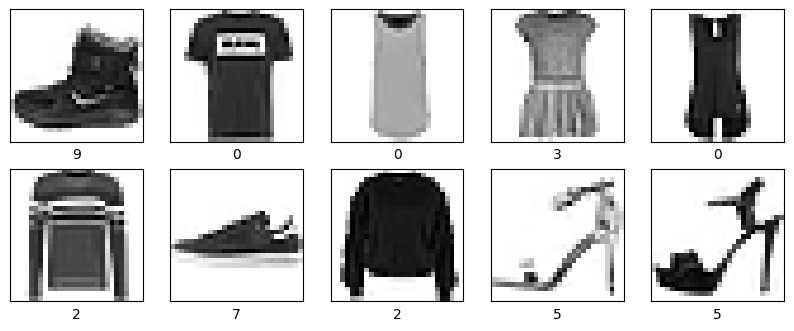

In [4]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_targets[i])
plt.show()

**Визначемо які значення є в train_targets**

In [5]:
unique_targets = np.unique(train_targets)
print("Унікальні мітки в train_targets:", unique_targets)

Унікальні мітки в train_targets: [0 1 2 3 4 5 6 7 8 9]


**Крок 2: визначемо параметри, зробивши їх змінними**

In [6]:
#аналіз унікальних міток показав що їх 10
number_of_classes = 10 

#швидкість навчання
lr = 0.01

# Розмір данних для навчання: (60000, 28, 28) 
# 28 означає розмір пікселів картинки, отже кількість атрибутів = 28 * 28 = 784
number_of_attributes = 784

# кількість нейронів 
first_layer = 68 
second_layer = 68 
third_layer = 64

#кількість епох
number_of_epochs = 25 

# batch_size
batch_size = 128 

activation='relu'

In [7]:
x_train = np.array(train_data, dtype=np.float32)
x_test = np.array(test_data, dtype=np.float32)

x_train = x_train.reshape([-1, number_of_attributes]) #вектор 28*28 елементів
x_test = x_test.reshape([-1, number_of_attributes]) #вектор 28*28 елементів

# у зображеннях, що зберігаються у форматі PNG або JPEG, значення пікселів можуть перебувати в діапазоні від 0 до 255
# тому для нормалізації використовуємо 255
x_train = x_train / 255.0 
x_test = x_test / 255.0

y_train = np.asarray(train_targets, dtype=np.float32)
y_test = np.asarray(test_targets, dtype=np.float32)

y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

**Крок 3: Створимо модель**

In [8]:
def train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation = activation, input_shape=(number_of_attributes,)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)  
    
    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)  
    
    plt.tight_layout()  
    plt.show()


C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6836 - loss: 1.0523 - val_accuracy: 0.7959 - val_loss: 0.5341
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8301 - loss: 0.4681 - val_accuracy: 0.8437 - val_loss: 0.4518
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8441 - loss: 0.4345 - val_accuracy: 0.8363 - val_loss: 0.4742
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8535 - loss: 0.4116 - val_accuracy: 0.8668 - val_loss: 0.3832
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8545 - loss: 0.3981 - val_accuracy: 0.8501 - val_loss: 0.4444
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8620 - loss: 0.3871 - val_accuracy: 0.8649 - val_loss: 0.3920
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8671 - loss: 0.3731 - val_accuracy: 0.8398 - val_loss: 0.4674
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8680 - loss: 0.3667 - val_accuracy: 0.

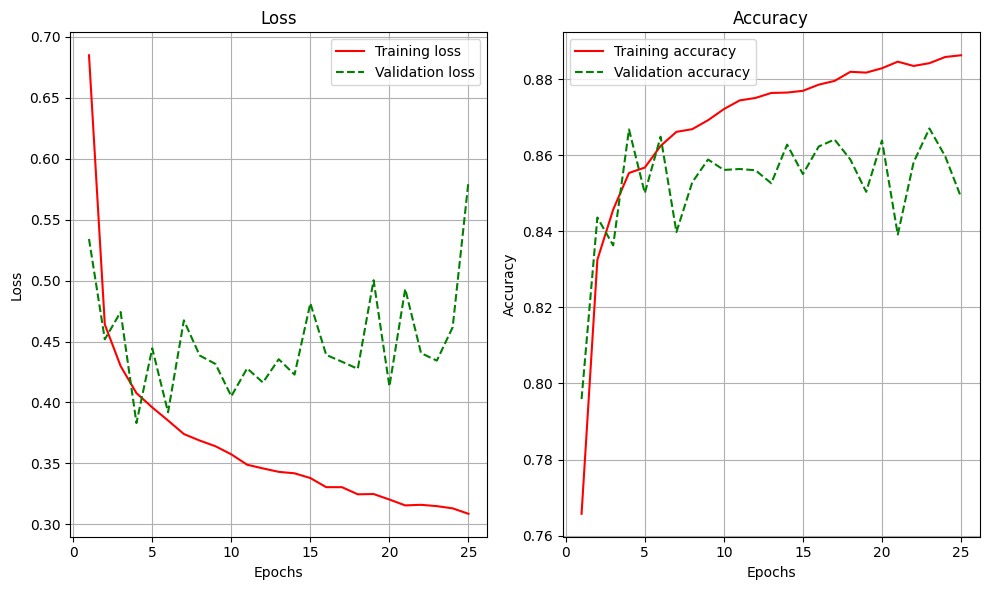

In [9]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

**Висновок до тесту 1: У цьому випадку точність на валідаційному наборі даних становить близько 88.87%. Це гарний результат, але не досягає мінімально запланованого 91%**

**Крок 4: Змінемо гіперпараметр Кількість шарів**

In [10]:
def train_model_two(number_of_attributes, number_of_classes, first_layer, second_layer, third_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation=activation, input_shape=(number_of_attributes,)))
    model.add(Dense(second_layer, activation=activation)) 
    model.add(Dense(third_layer, activation=activation))  
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання модели
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)  

    # Візуалізація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)  

    plt.tight_layout()
    plt.show()

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6057 - loss: 1.1893 - val_accuracy: 0.8311 - val_loss: 0.4783
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8149 - loss: 0.5115 - val_accuracy: 0.8217 - val_loss: 0.4881
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8339 - loss: 0.4633 - val_accuracy: 0.8344 - val_loss: 0.4718
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8438 - loss: 0.4353 - val_accuracy: 0.8617 - val_loss: 0.4258
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8490 - loss: 0.4318 - val_accuracy: 0.8468 - val_loss: 0.4317
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8550 - loss: 0.4082 - val_accuracy: 0.8509 - val_loss: 0.4350
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8560 - loss: 0.4079 - val_accuracy: 0.8531 - val_loss: 0.4307
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8549 - loss: 0.4077 - val_accuracy: 0.

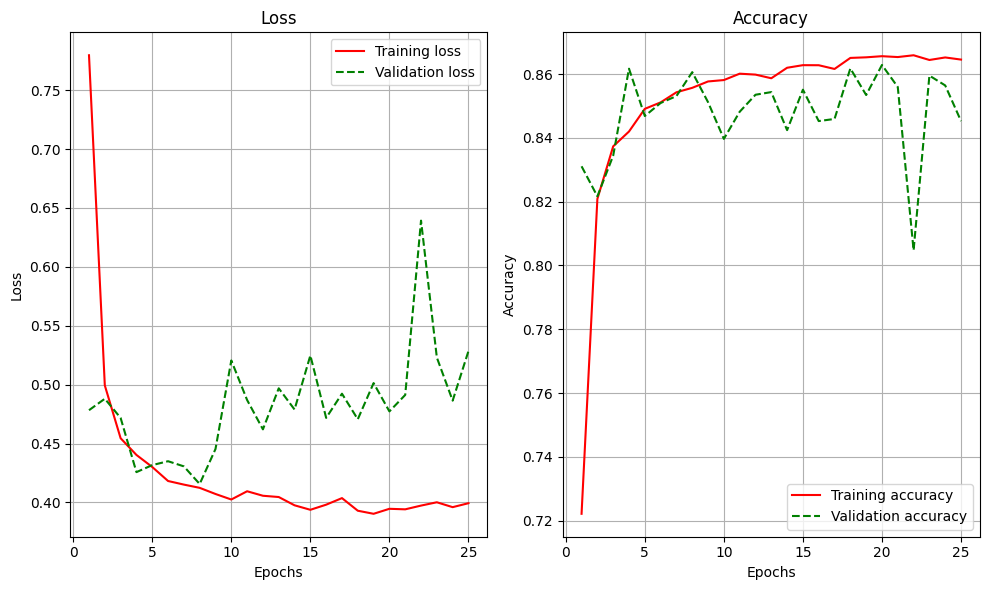

In [11]:
train_model_two(number_of_attributes, number_of_classes, first_layer, second_layer, third_layer, lr, number_of_epochs, batch_size, x_train, y_train)

**Висновок до тесту 2: Зміна кількості шарів не дала покращення. У цьому випадку точність на валідаційному наборі даних становить близько 86.46%. Це гарний результат, але не досягає мінімально запланованого 91%**

**Крок 5: Змінемо гіперпараметр Кількість нейронів**

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6738 - loss: 1.7717 - val_accuracy: 0.8118 - val_loss: 0.4893
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8293 - loss: 0.4701 - val_accuracy: 0.8268 - val_loss: 0.4623
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8458 - loss: 0.4291 - val_accuracy: 0.8407 - val_loss: 0.4648
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8560 - loss: 0.4025 - val_accuracy: 0.8549 - val_loss: 0.4279
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8647 - loss: 0.3851 - val_accuracy: 0.8615 - val_loss: 0.3943
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8694 - loss: 0.3633 - val_accuracy: 0.8550 - val_loss: 0.4301
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8705 - loss: 0.3599 - val_accuracy: 0.8628 - val_loss: 0.4008
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8781 - loss: 0.3417 - val_accuracy: 0.

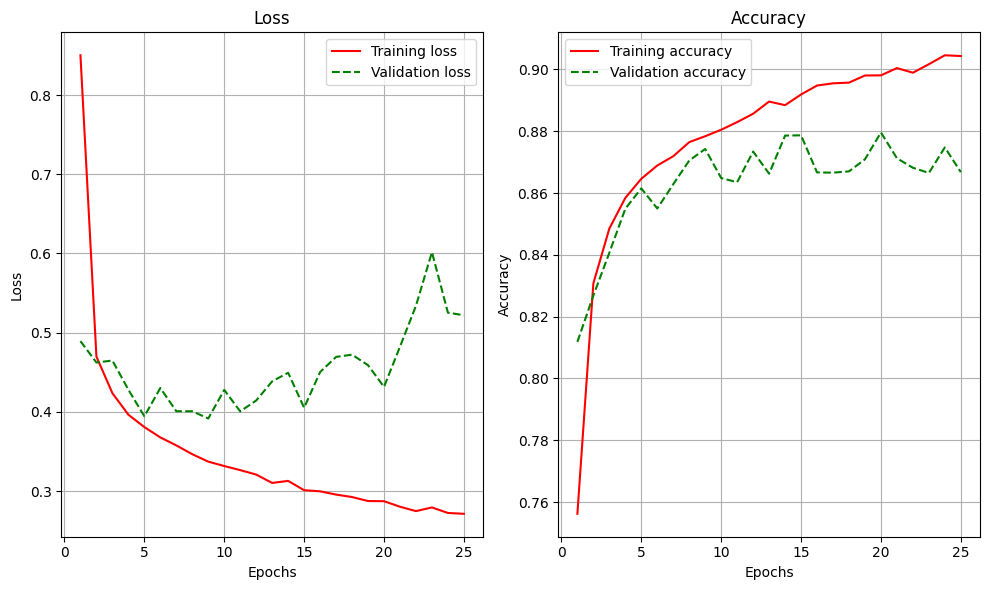

In [12]:
train_model(number_of_attributes, number_of_classes, 256, lr, number_of_epochs, batch_size, x_train, y_train)

**Висновок до тесту 3: Зміна кількості нейронів. У цьому випадку точність на валідаційному наборі даних становить близько 90,56%. Це гарний результат, але не досягає мінімально запланованого 91%**

**Крок 6: Змінемо гіперпараметр Функція активації**

In [13]:
activation='leaky_relu'

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6674 - loss: 1.4112 - val_accuracy: 0.7815 - val_loss: 0.5968
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8068 - loss: 0.5429 - val_accuracy: 0.8369 - val_loss: 0.4339
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8274 - loss: 0.4853 - val_accuracy: 0.7992 - val_loss: 0.5373
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8363 - loss: 0.4573 - val_accuracy: 0.8593 - val_loss: 0.3886
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8440 - loss: 0.4393 - val_accuracy: 0.8407 - val_loss: 0.4941
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8460 - loss: 0.4292 - val_accuracy: 0.8147 - val_loss: 0.5632
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8542 - loss: 0.4107 - val_accuracy: 0.8595 - val_loss: 0.4133
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.4080 - val_accuracy: 0.

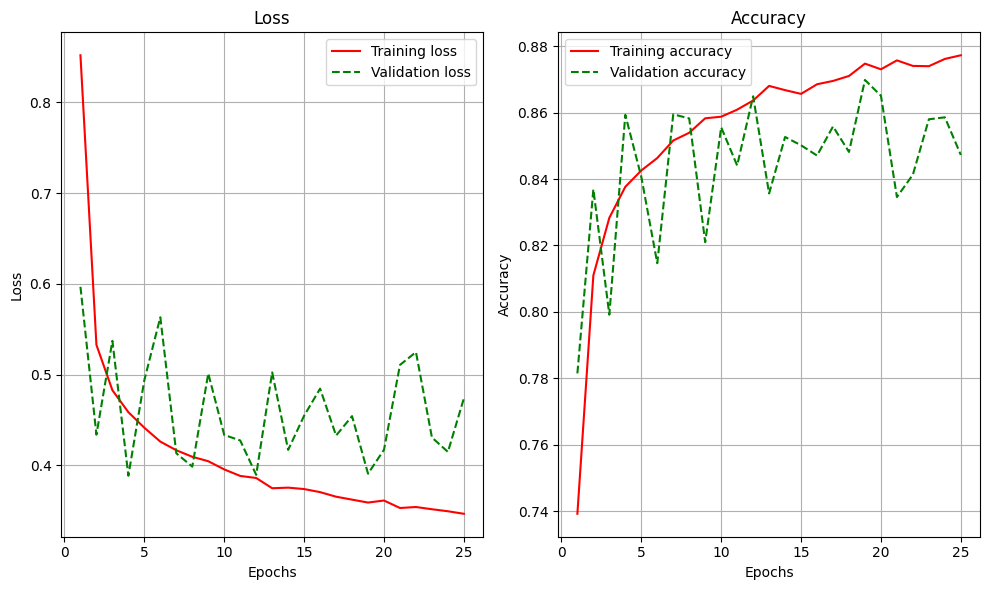

In [14]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

In [15]:
activation='elu'

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6625 - loss: 1.3645 - val_accuracy: 0.7893 - val_loss: 0.5491
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8122 - loss: 0.5045 - val_accuracy: 0.8344 - val_loss: 0.5096
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.4271 - val_accuracy: 0.8175 - val_loss: 0.5849
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8531 - loss: 0.4058 - val_accuracy: 0.8331 - val_loss: 0.4698
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8578 - loss: 0.3909 - val_accuracy: 0.8476 - val_loss: 0.4402
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8673 - loss: 0.3650 - val_accuracy: 0.8440 - val_loss: 0.5004
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.3532 - val_accuracy: 0.8612 - val_loss: 0.4212
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8772 - loss: 0.3398 - val_accuracy: 0.

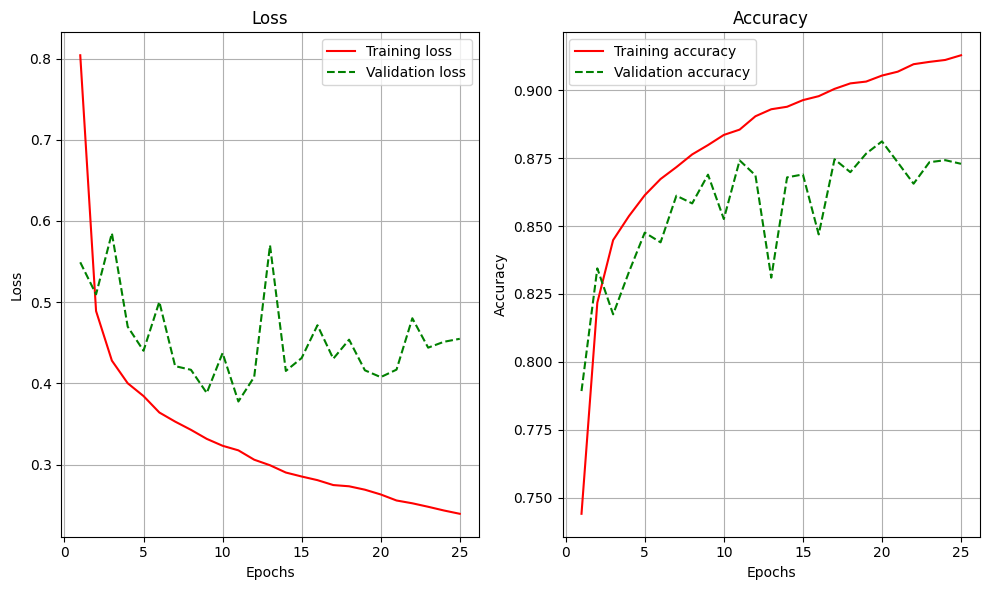

In [16]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

**Функція активації elu показала гарний результат і підвищила точність нашої моделі, вона становить 91,3%**

**Крок 7: змінемо кількість епох**

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6682 - loss: 1.3192 - val_accuracy: 0.7696 - val_loss: 0.6509
Epoch 2/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8184 - loss: 0.4968 - val_accuracy: 0.8419 - val_loss: 0.4579
Epoch 3/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8444 - loss: 0.4284 - val_accuracy: 0.8509 - val_loss: 0.4167
Epoch 4/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8530 - loss: 0.3973 - val_accuracy: 0.8495 - val_loss: 0.3970
Epoch 5/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8614 - loss: 0.3779 - val_accuracy: 0.8474 - val_loss: 0.4182
Epoch 6/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8661 - loss: 0.3601 - val_accuracy: 0.8667 - val_loss: 0.3979
Epoch 7/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8744 - loss: 0.3486 - val_accuracy: 0.8714 - val_loss: 0.3743
Epoch 8/35
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8774 - loss: 0.3279 - val_accuracy: 0.

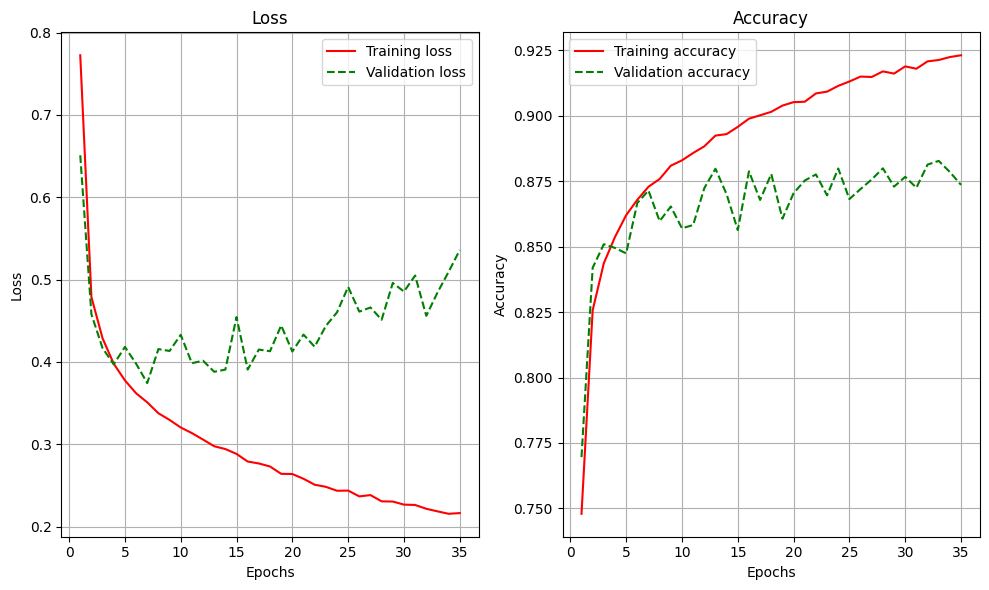

In [20]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 35, batch_size, x_train, y_train)

**Висновок: збільшення кількості епох до 35 покаращила точність моделі до 92,47%**

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6633 - loss: 1.3649 - val_accuracy: 0.7741 - val_loss: 0.5817
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8181 - loss: 0.4959 - val_accuracy: 0.8389 - val_loss: 0.4461
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8456 - loss: 0.4306 - val_accuracy: 0.8230 - val_loss: 0.5462
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.4017 - val_accuracy: 0.8682 - val_loss: 0.3763
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8608 - loss: 0.3824 - val_accuracy: 0.8435 - val_loss: 0.4402
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8683 - loss: 0.3609 - val_accuracy: 0.8457 - val_loss: 0.4474
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8756 - loss: 0.3440 - val_accuracy: 0.8514 - val_loss: 0.4308
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8785 - loss: 0.3341 - val_accuracy: 0.

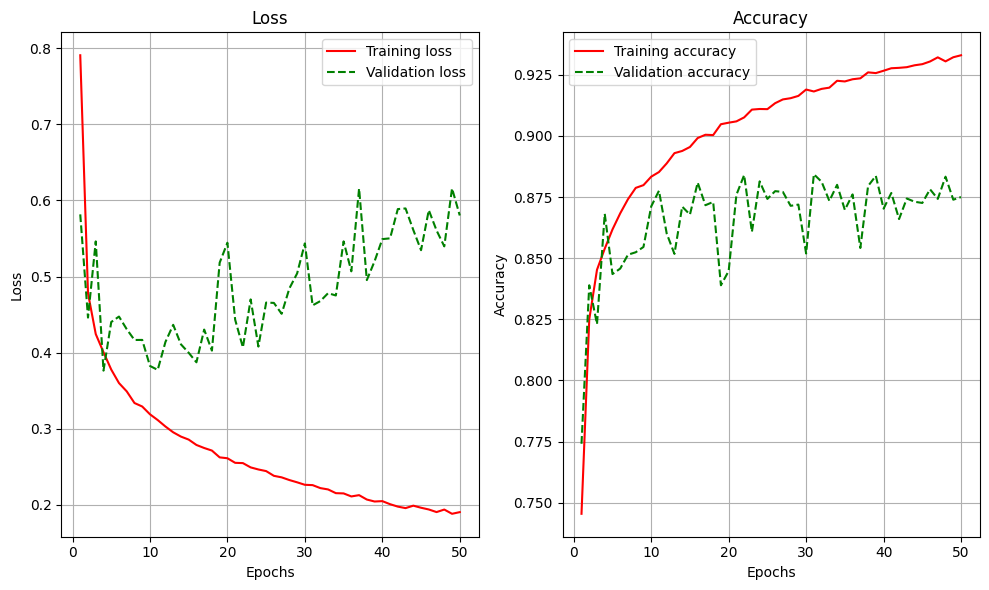

In [21]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 50, batch_size, x_train, y_train)

**Висновок: збільшення кількості епох до 50 покаращила точність моделі до 93,27%**

**Крок 8: змінемо кількість батчів**

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6704 - loss: 1.4358 - val_accuracy: 0.7729 - val_loss: 0.5746
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8086 - loss: 0.5199 - val_accuracy: 0.8180 - val_loss: 0.5057
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8413 - loss: 0.4327 - val_accuracy: 0.8578 - val_loss: 0.3908
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8547 - loss: 0.3927 - val_accuracy: 0.8220 - val_loss: 0.5054
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8588 - loss: 0.3854 - val_accuracy: 0.8562 - val_loss: 0.4098
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8683 - loss: 0.3617 - val_accuracy: 0.8337 - val_loss: 0.4813
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8727 - loss: 0.3518 - val_accuracy: 0.8723 - val_loss: 0.3972
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8789 - loss: 0.3342 - val_accuracy: 0.

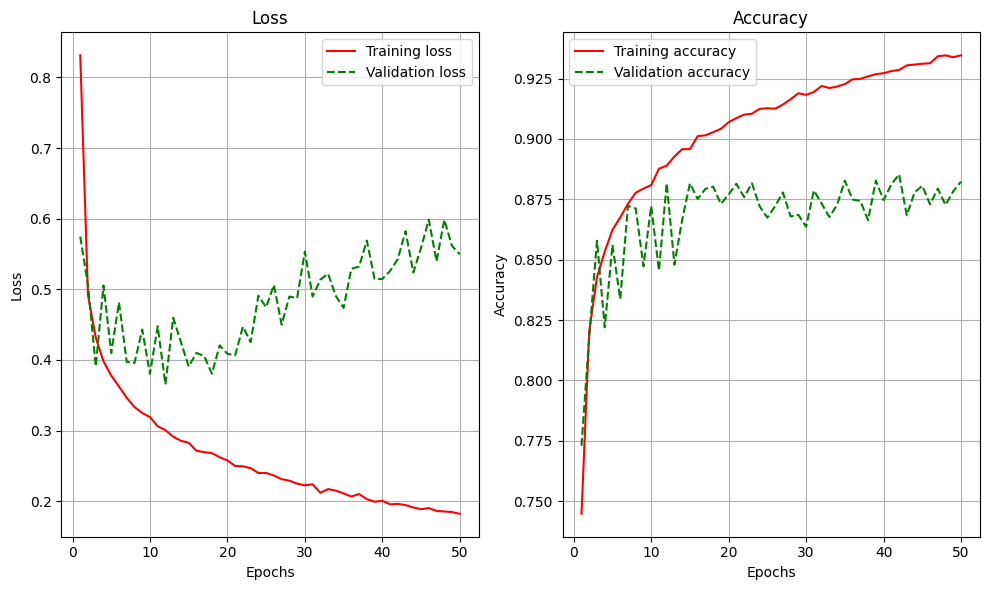

In [24]:
train_model(number_of_attributes, number_of_classes, first_layer, lr, 50, 150, x_train, y_train)

**Висновок: збільшення кількості батчів до 150 незначно покаращила точність моделі до 93,41%**

**Крок 9: змінемо вибору оптимізатору**

In [26]:
def train_model_three(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer, activation = activation, input_shape=(number_of_attributes,)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)  
    
    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)  
    
    plt.tight_layout()  
    plt.show()

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7283 - loss: 0.8487 - val_accuracy: 0.8438 - val_loss: 0.4468
Epoch 2/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8526 - loss: 0.4027 - val_accuracy: 0.8438 - val_loss: 0.4052
Epoch 3/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8657 - loss: 0.3696 - val_accuracy: 0.8678 - val_loss: 0.3642
Epoch 4/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8705 - loss: 0.3558 - val_accuracy: 0.8700 - val_loss: 0.3681
Epoch 5/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8763 - loss: 0.3302 - val_accuracy: 0.8726 - val_loss: 0.3482
Epoch 6/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8832 - loss: 0.3173 - val_accuracy: 0.8622 - val_loss: 0.3796
Epoch 7/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8825 - loss: 0.3201 - val_accuracy: 0.8681 - val_loss: 0.3667
Epoch 8/50
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8914 - loss: 0.2916 - val_accuracy: 0.

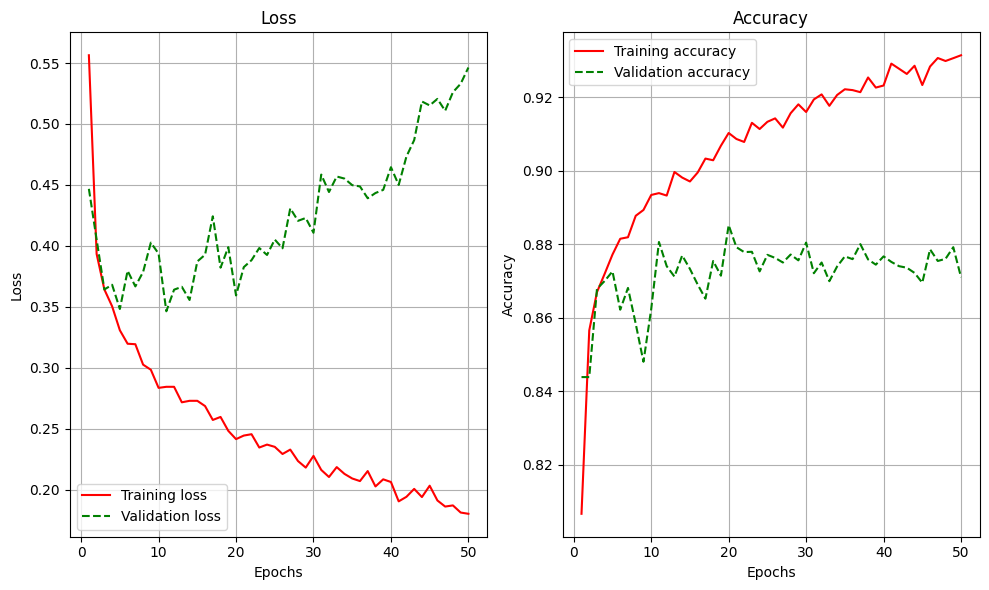

In [27]:
train_model_three(number_of_attributes, number_of_classes, first_layer, lr, 50, 150, x_train, y_train)

**Зміна вибору оптимізатору на  Адам трохи погіршила результат точності моделі, який тепер становить 93,12%**

**Крок 10: зміна техніки регулярізації**

In [33]:
def train_model_four(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train):
    # Модель
    model = Sequential()
    model.add(Dense(first_layer,
                    activation = activation,
                    input_shape=(number_of_attributes,),
                    kernel_regularizer=regularizers.l2(0.01),
                    bias_regularizer=regularizers.l2(0.01)))
    model.add(Dense(number_of_classes, activation='softmax'))

    # Компіляція моделі
    optimizer = optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss=losses.categorical_crossentropy,
                  metrics=['accuracy'])

    # Розбивка даних на навчальний та тестовий набори
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

    # Навчання моделі
    history = model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Візуалізація історії навчання
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.figure(figsize=(10, 6))

    # Візуалізація втрат
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'r-', label='Training loss')
    plt.plot(epochs, val_loss_values, 'g--', label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)  
    
    # Візуалазація точності
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['accuracy'], 'r-', label='Training accuracy')
    plt.plot(epochs, history_dict['val_accuracy'], 'g--', label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)  
    
    plt.tight_layout()  
    plt.show()

C:\Users\olgav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5847 - loss: 2.1342 - val_accuracy: 0.6469 - val_loss: 1.1704
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6681 - loss: 1.2407 - val_accuracy: 0.6478 - val_loss: 1.1014
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6787 - loss: 1.1705 - val_accuracy: 0.6863 - val_loss: 1.0733
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6867 - loss: 1.1072 - val_accuracy: 0.5629 - val_loss: 1.4728
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6912 - loss: 1.1131 - val_accuracy: 0.7283 - val_loss: 0.9790
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7029 - loss: 1.0357 - val_accuracy: 0.7335 - val_loss: 0.9350
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7007 - loss: 1.0563 - val_accuracy: 0.7770 - val_loss: 0.8345
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7031 - loss: 1.0333 - val_accuracy: 0.

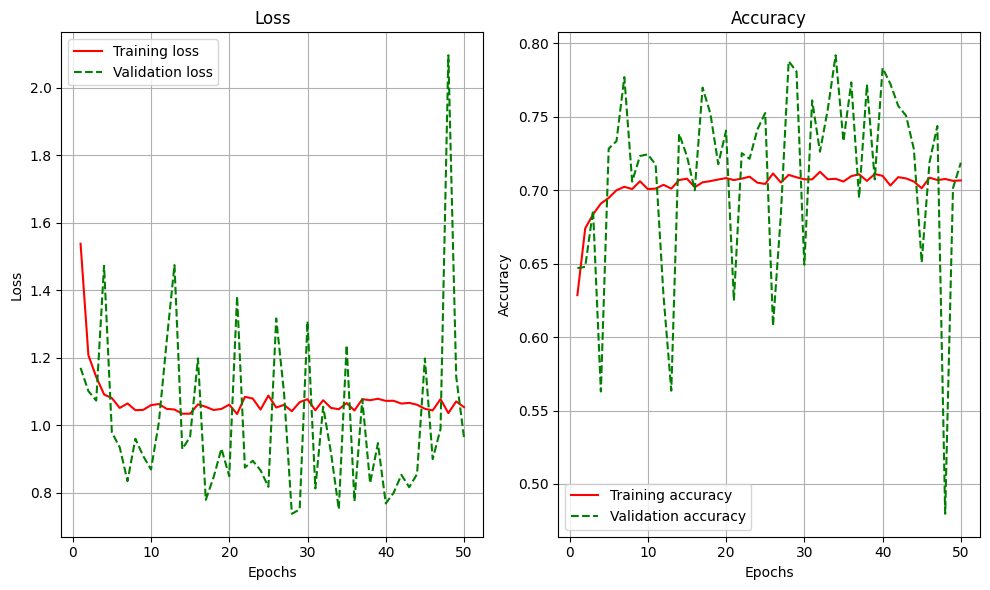

In [35]:
train_model_four(number_of_attributes, number_of_classes, first_layer, lr, number_of_epochs, batch_size, x_train, y_train)

**Зміна техніки регуляризації погіршила результат, тому залишимо попередню.**

## Загальний висновок: найкраще себе показала модель з наступними гіперпараметрами


number_of_classes = 10  
lr = 0.01  
number_of_attributes = 784  
first_layer = 68  
number_of_epochs = 50  
batch_size = 150  
activation='relu'  